In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=sns.load_dataset('titanic')   #loading the dataset

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.info()  #This gives us the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.shape  #This tells us about the shape of the dataset

(891, 15)

# Checking for duplicates

In [6]:
df[df.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
#droping the duplicated values
df.drop_duplicates(keep='first',inplace=True)

In [9]:
df[df.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


# Checking for null values

In [10]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

There are 106 null values in Age

There are 582 null values in Deck

There are 2 null values in embarked

There are 2 null values in embark_town

# Filling null values

In [11]:
df['age'] = df['age'].fillna(df['age'].median())

In [12]:
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

In [14]:
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])

In [15]:
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])

In [16]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [18]:
df.reset_index(drop='False',inplace=True)

In [19]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.00,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.00,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0,3,female,39.00,0,5,29.1250,Q,Third,woman,False,C,Queenstown,no,False
780,1,1,female,19.00,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
781,0,3,female,28.25,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
782,1,1,male,26.00,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Checking for datatypes

In [20]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

# Univariate Analysis

<AxesSubplot:xlabel='fare', ylabel='Density'>

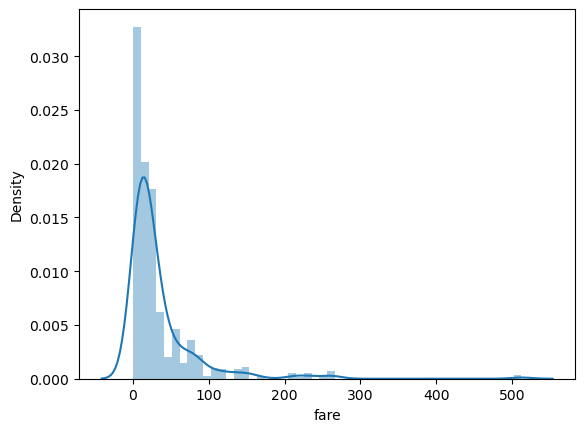

In [22]:
sns.distplot(df.fare)

# Multivariate Analysis

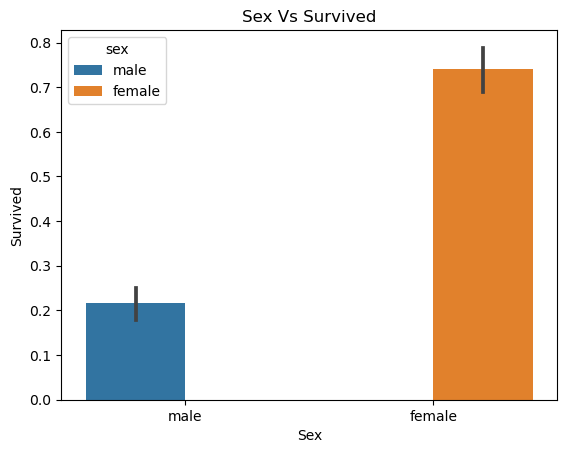

In [29]:
sns.barplot(x='sex',y='survived',data=df,hue='sex')
plt.title('Sex Vs Survived')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.show()

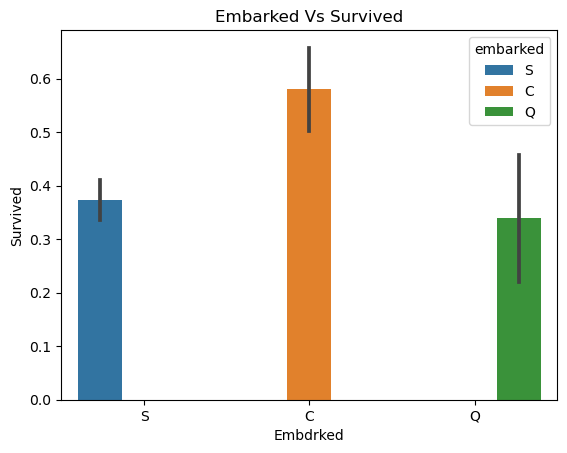

In [28]:
sns.barplot(x='embarked',y='survived',data=df,hue='embarked')
plt.title('Embarked Vs Survived')
plt.xlabel('Embdrked')
plt.ylabel('Survived')
plt.show()

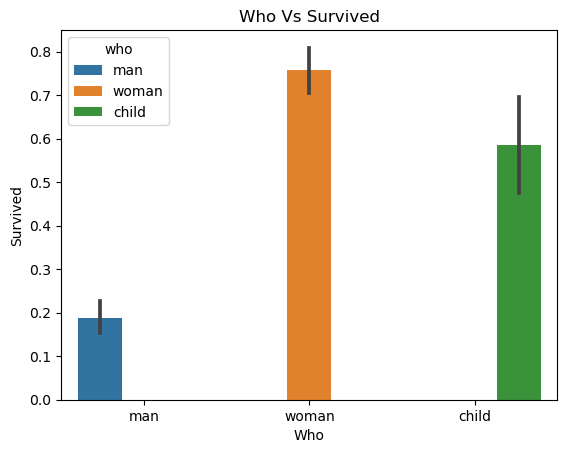

In [31]:
sns.barplot(x='who',y='survived',data=df,hue='who')
plt.title('Who Vs Survived')
plt.xlabel('Who')
plt.ylabel('Survived')
plt.show()

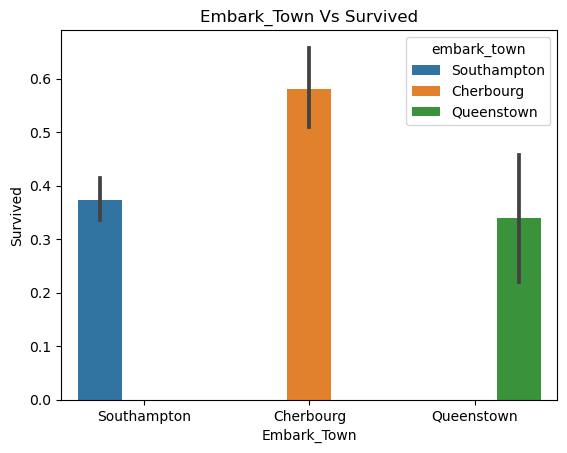

In [32]:
sns.barplot(x='embark_town',y='survived',data=df,hue='embark_town')
plt.title('Embark_Town Vs Survived')
plt.xlabel('Embark_Town')
plt.ylabel('Survived')
plt.show()

<AxesSubplot:xlabel='survived', ylabel='count'>

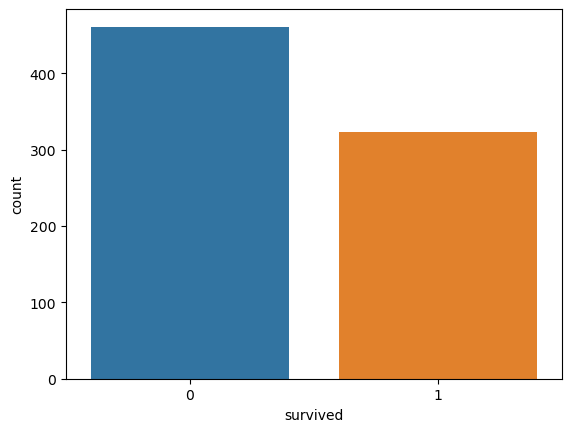

In [36]:
sns.countplot(x = df.survived)

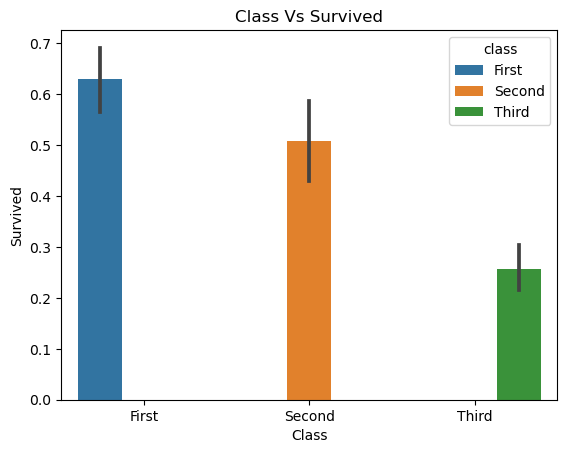

In [38]:
sns.barplot(x='class',y='survived',data=df,hue='class')
plt.title('Class Vs Survived')
plt.xlabel('Class')
plt.ylabel('Survived')
plt.show()